
# Bibliotecas 

In [1]:
import tensorflow as tf
from numpy.random import RandomState
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import manifold, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from matplotlib import ticker

In [2]:

## carrega a base de dados do MNIST
mnist = tf.keras.datasets.mnist.load_data()
#fmnist = tf.keras.datasets.fashion_mnist.load_data()
#cifar10 = tf.keras.datasets.cifar10.load_data()

## extrai as imagens e rótulos da base de treinamento
#(train_images, train_labels), _ = mnist
(train_images, train_labels), _ = mnist = tf.keras.datasets.mnist.load_data()


# cria uma lista para armazenar as imagens e rótulos dos dígitos 0 e 3
images = []
labels = []

n_samples = 200 #temos 200 amostras
rng = RandomState(0)

def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

#função que plota um gráfico 2d
def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


# percorre todas as imagens e rótulos da base de treinamento
for i in range(train_images.shape[0]):
    # verifica se o rótulo é 0 ou 3
    if train_labels[i] == 0 or train_labels[i] == 3:
        # adiciona a imagem e rótulo à lista
        images.append(train_images[i])
        labels.append(train_labels[i])
    # para o loop se já foram coletadas 200 amostras de imagens
    if len(images) == 200:
        break

# converte as listas em arrays numpy
images = np.array(images)
labels = np.array(labels)

# imprime o número de amostras de imagens e seus rótulos
print("Número de amostras de imagens: {}".format(images.shape[0]))
print("Rótulos: {}".format(np.unique(labels)))

#Precisamos converter o vetor de imagens em um vetor de pontos
images_vetor = images.reshape(images.shape[0],-1)

Número de amostras de imagens: 200
Rótulos: [0 3]


## PCA

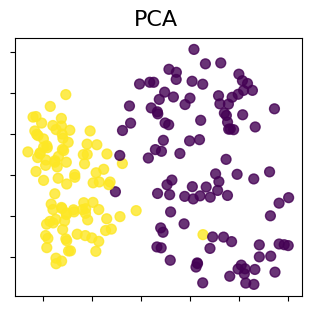

In [3]:
# técnica PCA para redução de dimensionalidade

# Precisamos converter o vetor de imagens em um um vetor de pontos 
images_vetor = images.reshape(images.shape[0], -1)

pca = PCA(n_components=2)
Y_pca = pca.fit_transform(images_vetor)
S_color = labels;

plot_2d(Y_pca, S_color, "PCA")


## MDS

c:\Users\misae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


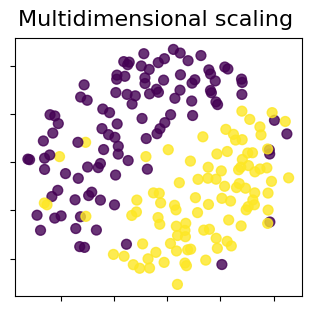

In [4]:
# técnica MDS para redução de dimensionalidade

md_scaling = manifold.MDS(
    n_components=2, max_iter=50, n_init=4, random_state=rng
)
S_scaling = md_scaling.fit_transform(images_vetor)

plot_2d(S_scaling, labels, "Multidimensional scaling")

PERCEPTRON

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.0038146  0.01780148 0.05562964 0.07851726 0.08042456
 0.07851726 0.04323218 0.07533842 0.         0. 

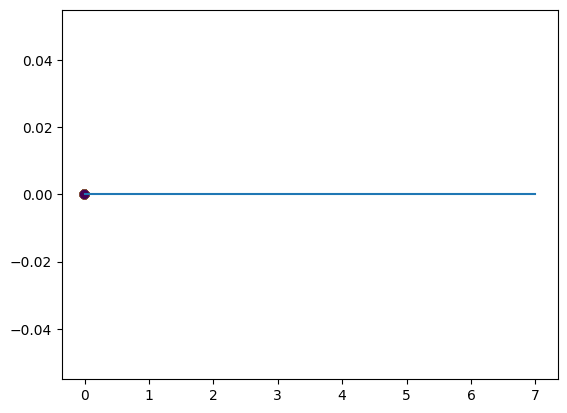

In [25]:

def detailed_perceptron(X, y, T):
    n, d = X.shape # n é o número de exemplos e d é a dimensão
    w = np.zeros(d) # inicialização de w como um vetor de zeros de dimensão d
    w = np.dot(y,X) # inicialização de w como uma combinação linear de cada exemplo multiplicado pelo seu rótulo
    i = 0 # contador para índices de exemplos
    t = 0 # contador para o número de atualizações
    last_update = 0 # contador para o último exemplo atualizado
    while t < T and last_update != i: # enquanto não atingirmos o número máximo de iterações T e não atualizarmos todos os exemplos
        xi = X[i] # selecionando o exemplo atual
        yi = y[i] # selecionando o rótulo do exemplo atual
        if yi*np.dot(w,xi) < 0: # se o exemplo atual estiver mal classificado
            w = w + yi*xi # atualizamos o vetor de pesos
            t += 1 # incrementamos o contador de atualizações
            last_update = i # atualizamos o índice do último exemplo atualizado
        i = (i + 1) % n # selecionamos o próximo exemplo (usando operação módulo para garantir que i fique dentro dos limites de 0 a n-1)
    return w/np.linalg.norm(w) # retornamos o vetor de pesos normalizado

# Gere exemplos aleatórios linearmente separáveis (substitua isso pelos seus dados reais)
X = np.array(images_vetor)
y = np.array(labels)

# Divida os dados em 80% para treinamento e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Execute o algoritmo Perceptron no conjunto de treinamento
w = detailed_perceptron(X_train, y_train, 200)
print(w)
# Plote os exemplos de treinamento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)


# Plote a linha de separação aprendida
x_plot = np.linspace(0, 7, 10)

# Evite a divisão por zero usando numpy
denominator = np.where(np.abs(w[1]) < 1e-5, 1e-5, w[1])

y_plot = w[2] / denominator - w[0] / denominator * x_plot
plt.plot(x_plot, y_plot)

plt.show()